In [64]:
import yfinance as yf
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

ticker = "AAPL"
stock_data = yf.download(ticker, start="2013-01-01", end="2024-11-21")
stock_data.to_csv("apple_stock_data.csv")
data = pd.read_csv('apple_stock_data.csv')

[*********************100%***********************]  1 of 1 completed


C:\Users\janan\AppData\Local\Temp\ipykernel_14520\2984619210.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').mean()


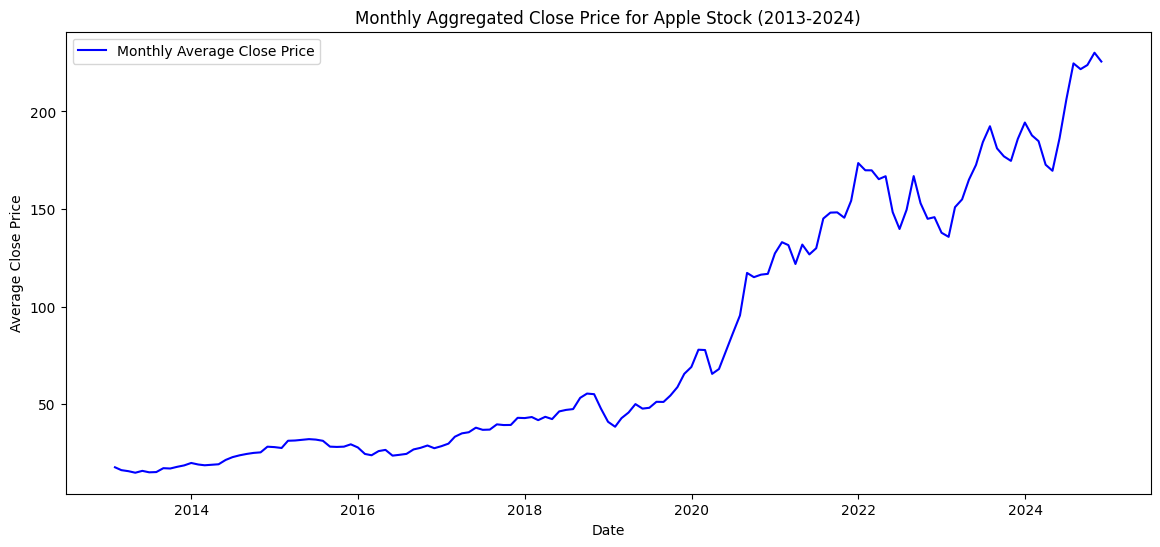

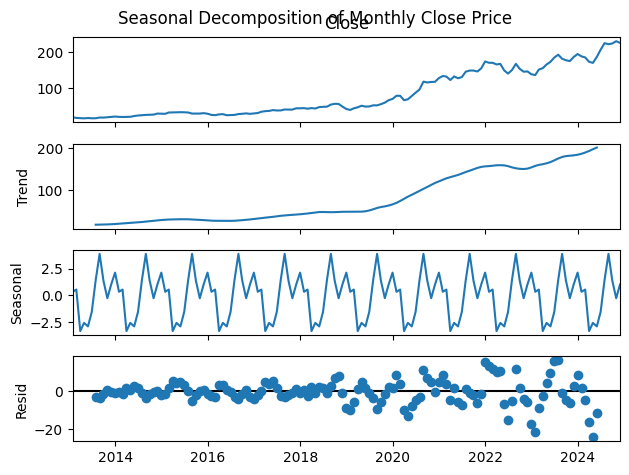

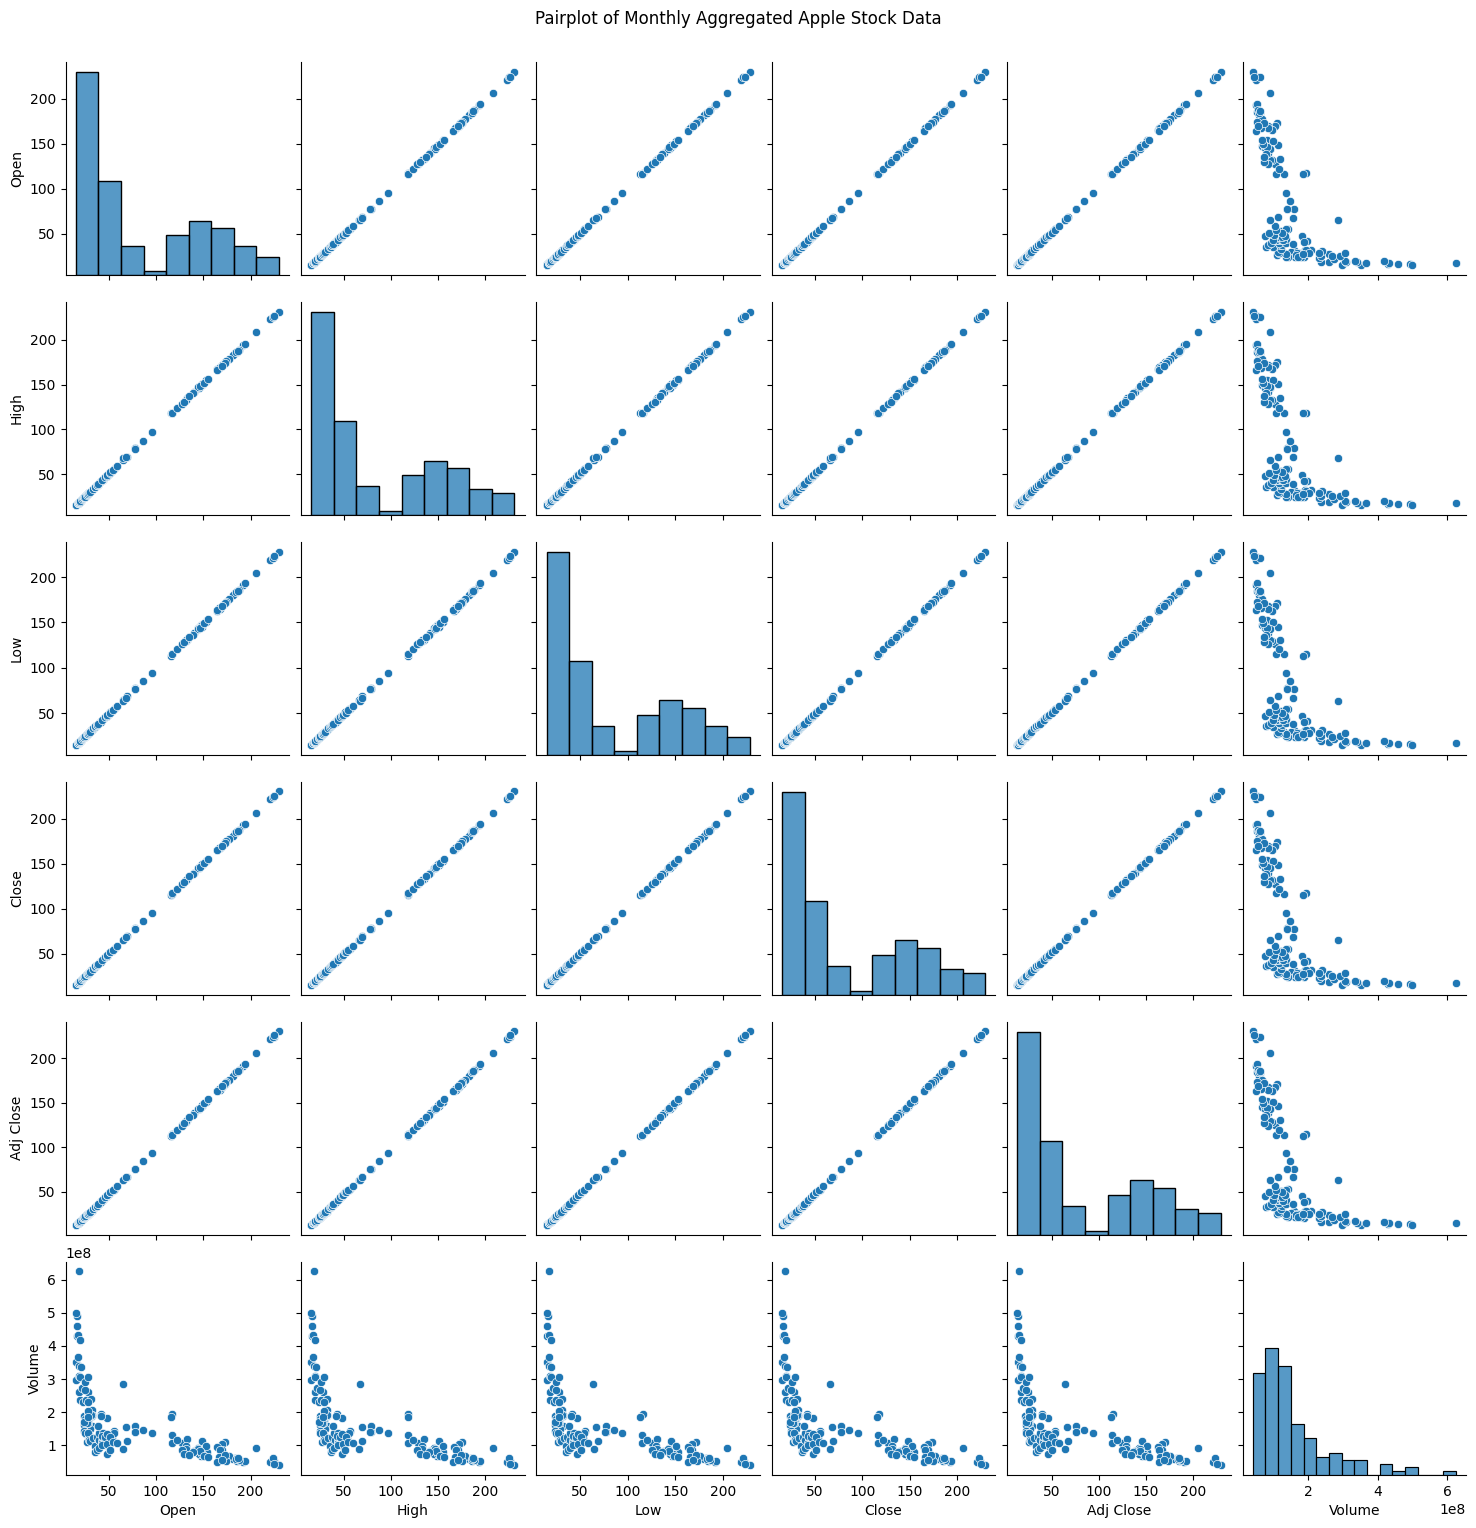

In [65]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

monthly_data = data.resample('M').mean()


plt.figure(figsize=(14, 6))
plt.plot(monthly_data.index, monthly_data['Close'], label='Monthly Average Close Price', color='blue')
plt.title('Monthly Aggregated Close Price for Apple Stock (2013-2024)')
plt.xlabel('Date')
plt.ylabel('Average Close Price')
plt.legend()
plt.show()

decomposition = seasonal_decompose(monthly_data['Close'], model='additive')
decomposition.plot()
plt.suptitle('Seasonal Decomposition of Monthly Close Price')
plt.show()

sns.pairplot(monthly_data)
plt.suptitle('Pairplot of Monthly Aggregated Apple Stock Data', y=1.02)
plt.show()

monthly_data_stats = monthly_data.describe()


1. Observed Component (Top Panel):

- The time series demonstrates an upward trend over time, indicating consistent growth in the stock price.
- Some fluctuations and minor drops can be observed, reflecting real-world market behavior.
2. Trend Component (Second Panel):


- The upward trend confirms long-term positive growth in the stock price.
- The steep incline from 2020 onwards could indicate periods of significant growth, possibly driven by major product launches, events, or favorable market conditions.
3. Seasonal Component (Third Panel):

- There is a clear periodic pattern, with regular peaks and troughs.
- This suggests seasonality in the stock price, which could be tied to predictable factors such as:
    - Quarterly earnings reports.
    - Holiday sales seasons boosting revenue (e.g., the holiday quarter for Apple products).
    - Cyclical market trends.
4. Residual Component (Bottom Panel):

- The residual values are relatively small, indicating that most variations in the data are well-accounted for by the trend and seasonal components.
- Outliers in the residuals, especially in recent years, could correspond to unexpected market events, such as economic shifts, global crises, or one-off events like product recalls or supply chain disruptions.

C:\Users\janan\AppData\Local\Temp\ipykernel_14520\2065221457.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_data.index[-1], periods=11, freq='M')[1:], forecast, label='Forecast', color='red')


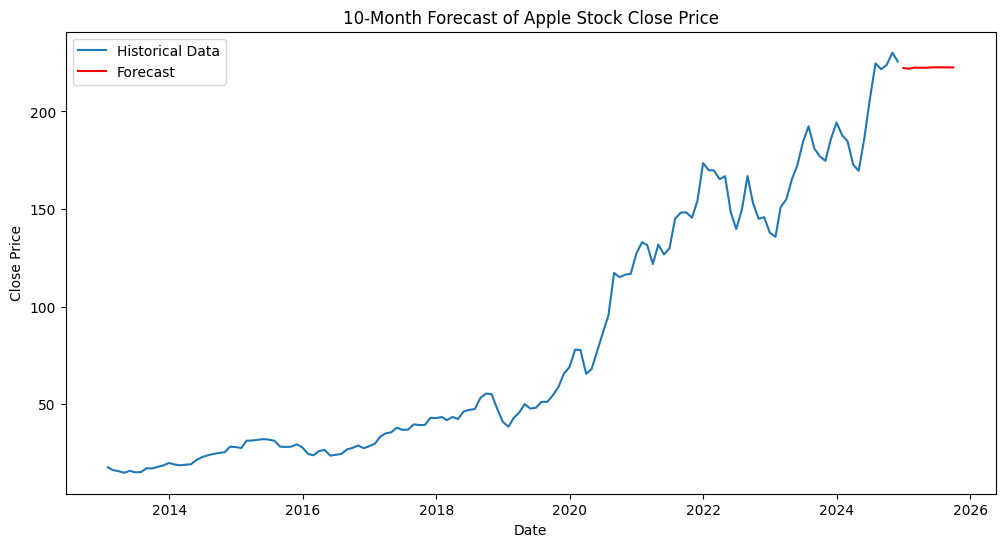

2024-12-31    222.184642
2025-01-31    221.847525
2025-02-28    222.438895
2025-03-31    222.381784
2025-04-30    222.388991
2025-05-31    222.522361
2025-06-30    222.594396
2025-07-31    222.569599
2025-08-31    222.549697
2025-09-30    222.548467
Freq: ME, Name: predicted_mean, dtype: float64

In [66]:
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(monthly_data['Close'], order=(5, 1, 0))
model_fit = model.fit()


forecast = model_fit.forecast(steps=10)


plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['Close'], label='Historical Data')
plt.plot(pd.date_range(monthly_data.index[-1], periods=11, freq='M')[1:], forecast, label='Forecast', color='red')
plt.title('10-Month Forecast of Apple Stock Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

forecast

00:00:26 - cmdstanpy - INFO - Chain [1] start processing
00:00:26 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\janan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


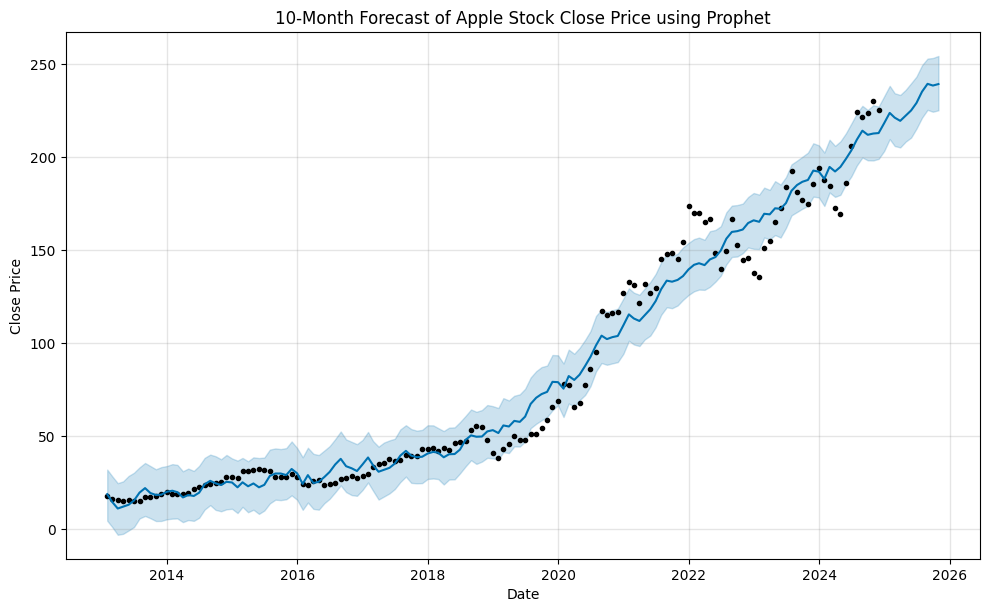

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
15,2014-04-30,19.003068,4.991437,32.654918,19.003068,19.003068,-0.558142,-0.558142,-0.558142,-0.558142,-0.558142,-0.558142,0.0,0.0,0.0,18.444926
38,2016-03-31,28.414875,10.984745,40.585701,28.414875,28.414875,-3.548461,-3.548461,-3.548461,-3.548461,-3.548461,-3.548461,0.0,0.0,0.0,24.866414
23,2014-12-31,22.292475,11.041072,38.099053,22.292475,22.292475,2.894290,2.894290,2.894290,2.894290,2.894290,2.894290,0.0,0.0,0.0,25.186766
150,2025-07-31,230.851452,221.257642,249.467742,230.075056,231.669266,4.401587,4.401587,4.401587,4.401587,4.401587,4.401587,0.0,0.0,0.0,235.253039
124,2023-05-31,174.042146,156.847301,185.332384,174.042146,174.042146,-1.735093,-1.735093,-1.735093,-1.735093,-1.735093,-1.735093,0.0,0.0,0.0,172.307053


In [67]:
from prophet import Prophet


prophet_data = monthly_data.reset_index()[['Date', 'Close']]
prophet_data.columns = ['ds', 'y']

model = Prophet()
model.fit(prophet_data)

future_dates = model.make_future_dataframe(periods=11, freq='M')

forecast = model.predict(future_dates)

fig = model.plot(forecast)
plt.title('10-Month Forecast of Apple Stock Close Price using Prophet')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)
forecast.sample(5)


The plot generated by the Prophet model provides a visual representation of the historical Apple stock data, as well as the model's forecast for the next 10 months. Here’s an explanation of each element on the plot:

### Explanation of the Plot:
1. **Black Dots (Observed Data)**:
   - The black dots represent the actual, historical observed close prices of the Apple stock from 2014 to 2024. These points provide a visual record of how the stock price has evolved over time.

2. **Blue Line (Forecasted Line)**:
   - The solid blue line represents the predicted values (the `yhat` column) generated by the Prophet model. It shows the model's best estimate for the closing prices of Apple stock over the forecast period (in this case, 10 months into 2024).

3. **Light Blue Shaded Area (Uncertainty Interval)**:
   - The shaded blue region around the forecasted line represents the confidence interval (typically 80% or 95%) of the forecast. This interval, depicted by the `yhat_lower` and `yhat_upper` columns, indicates the range within which the model predicts the actual stock prices are likely to fall. A wider shaded area suggests greater uncertainty in the forecast, while a narrower area indicates higher confidence.

### Interpretation:
- **Trend and Seasonality**: The blue line follows an upward trend, suggesting that the model anticipates the Apple stock prices to continue rising over the forecast period. The small fluctuations and curvature in the line indicate the model's understanding of seasonal patterns in the data.
- **Confidence Interval Significance**: The light blue area helps convey the uncertainty of the forecast. If the shaded region is narrow, the model is confident in its predictions; if it is wide, the model has lower confidence and there is more uncertainty about where the actual prices might land.
- **Model Accuracy and Observed Data**: Comparing the blue line (forecast) with the black dots (actual data) up to the present gives an idea of how well the model fits the historical data. If the blue line closely aligns with the black dots, the model has learned the data's trend and seasonality well.

### Key Takeaways:
- **Overall Upward Trend**: The blue line indicates that the Prophet model predicts an upward trend in Apple stock prices for the next 10 months.
- **Predictive Range**: The light blue confidence interval shows the expected range where the actual stock prices may fall, providing a measure of uncertainty in the prediction.
- **Historical Fit**: By seeing how the forecast line aligns with past observed data (the black dots), you can assess how effectively the model has captured historical trends and seasonality.

This plot is useful for visualizing not just the central forecast but also the uncertainty, which is important for understanding the risk and reliability of predictions in financial forecasting.

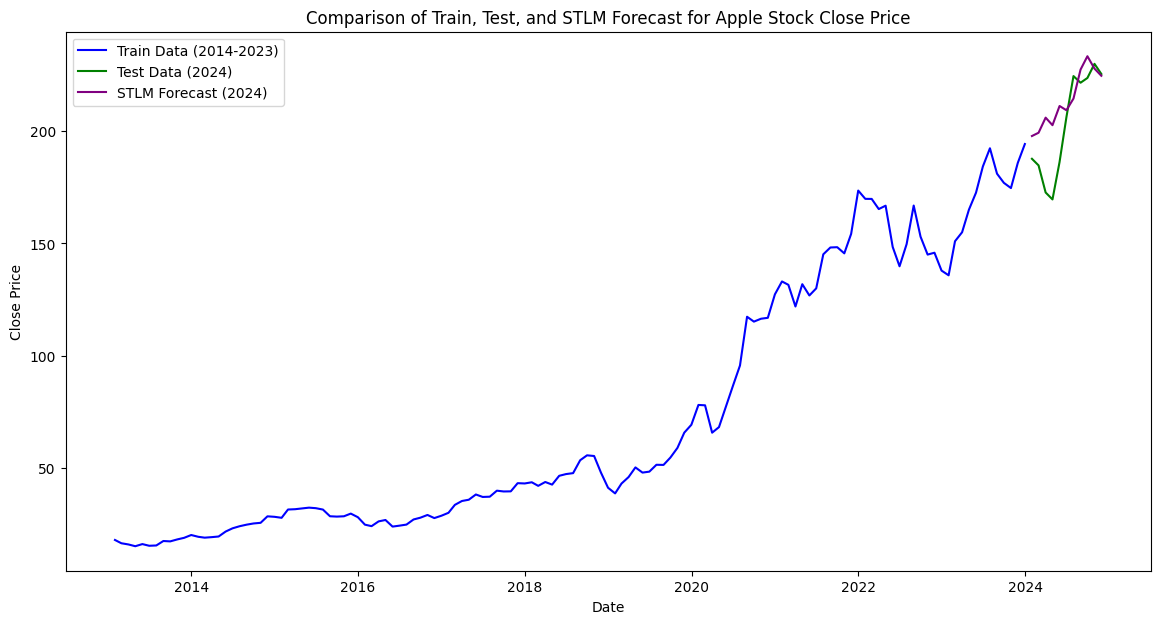

STLM Forecast for 2024:
2024-01-31    197.874170
2024-02-29    199.330582
2024-03-31    206.068001
2024-04-30    202.704225
2024-05-31    211.260888
2024-06-30    209.373138
2024-07-31    214.571309
2024-08-31    227.510575
2024-09-30    233.451446
2024-10-31    227.929431
2024-11-30    224.728629
Freq: ME, dtype: float64


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.holtwinters import ExponentialSmoothing

train_data = monthly_data.loc[:'2023-12-31']
test_data = monthly_data.loc['2024-01-01':]

stl = STL(train_data['Close'], seasonal=13)
result = stl.fit()

trend_model = ExponentialSmoothing(result.trend, trend='add', seasonal=None).fit()
trend_forecast = trend_model.forecast(len(test_data))

seasonal_forecast = list(result.seasonal[-13:]) * 2 
seasonal_forecast = seasonal_forecast[:len(test_data)] 

stlm_forecast = trend_forecast + seasonal_forecast

plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data['Close'], label='Train Data (2014-2023)', color='blue')
plt.plot(test_data.index, test_data['Close'], label='Test Data (2024)', color='green')
plt.plot(test_data.index, stlm_forecast, label='STLM Forecast (2024)', color='purple')
plt.title('Comparison of Train, Test, and STLM Forecast for Apple Stock Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

print("STLM Forecast for 2024:")
print(stlm_forecast)



00:00:27 - cmdstanpy - INFO - Chain [1] start processing
00:00:27 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\janan\AppData\Local\Temp\ipykernel_14520\3818681724.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range('2024-01-01', periods=11, freq='M')


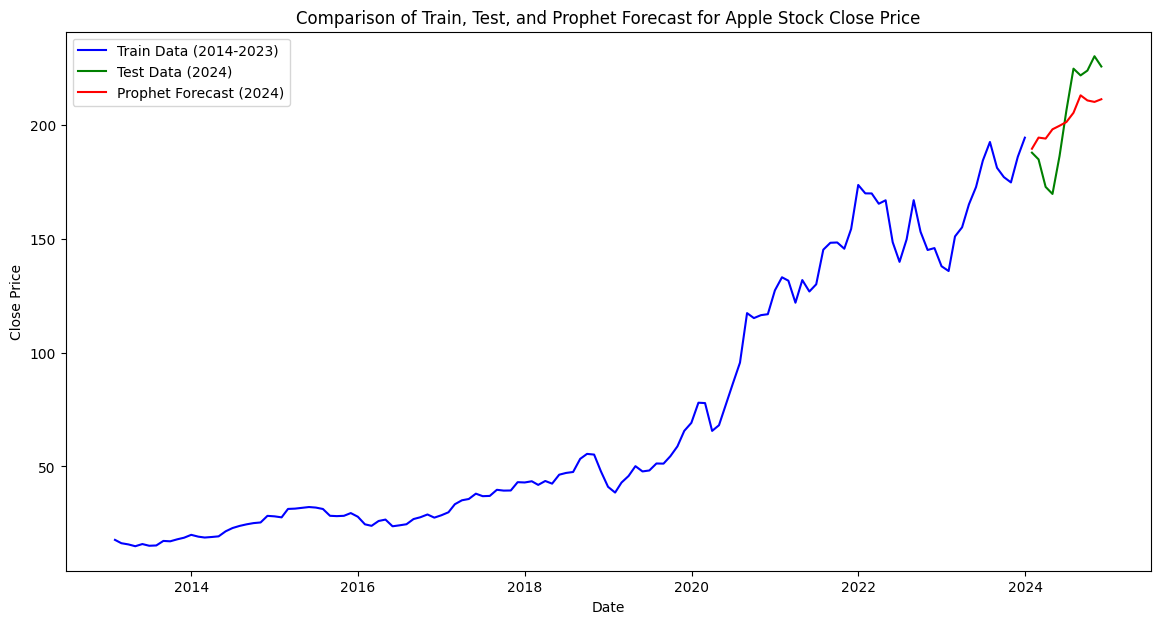

In [69]:
from prophet import Prophet

prophet_data = train_data.reset_index()[['Date', 'Close']]
prophet_data.columns = ['ds', 'y']

prophet_model = Prophet()
prophet_model.fit(prophet_data)

future_dates = pd.date_range('2024-01-01', periods=11, freq='M')
future = pd.DataFrame({'ds': future_dates})

prophet_forecast = prophet_model.predict(future)

plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data['Close'], label='Train Data (2014-2023)', color='blue')
plt.plot(test_data.index, test_data['Close'], label='Test Data (2024)', color='green')
plt.plot(future['ds'], prophet_forecast['yhat'], label='Prophet Forecast (2024)', color='red')
plt.title('Comparison of Train, Test, and Prophet Forecast for Apple Stock Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


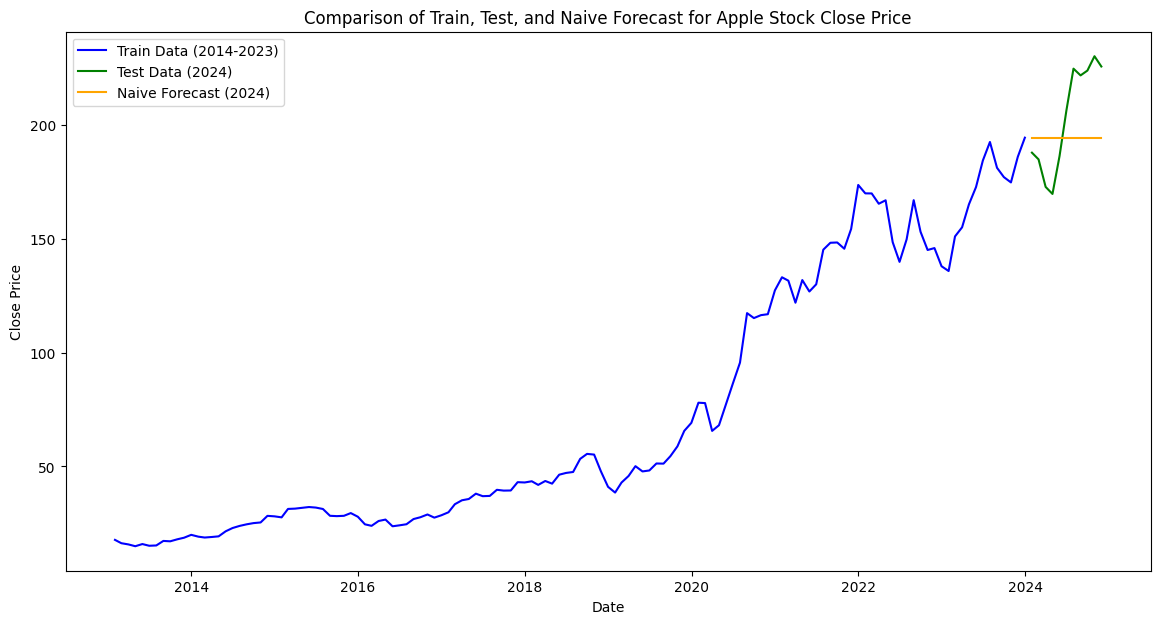

In [70]:

naive_forecast = np.repeat(train_data['Close'].iloc[-1], len(test_data))


plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data['Close'], label='Train Data (2014-2023)', color='blue')
plt.plot(test_data.index, test_data['Close'], label='Test Data (2024)', color='green')
plt.plot(test_data.index, naive_forecast, label='Naive Forecast (2024)', color='orange')
plt.title('Comparison of Train, Test, and Naive Forecast for Apple Stock Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()




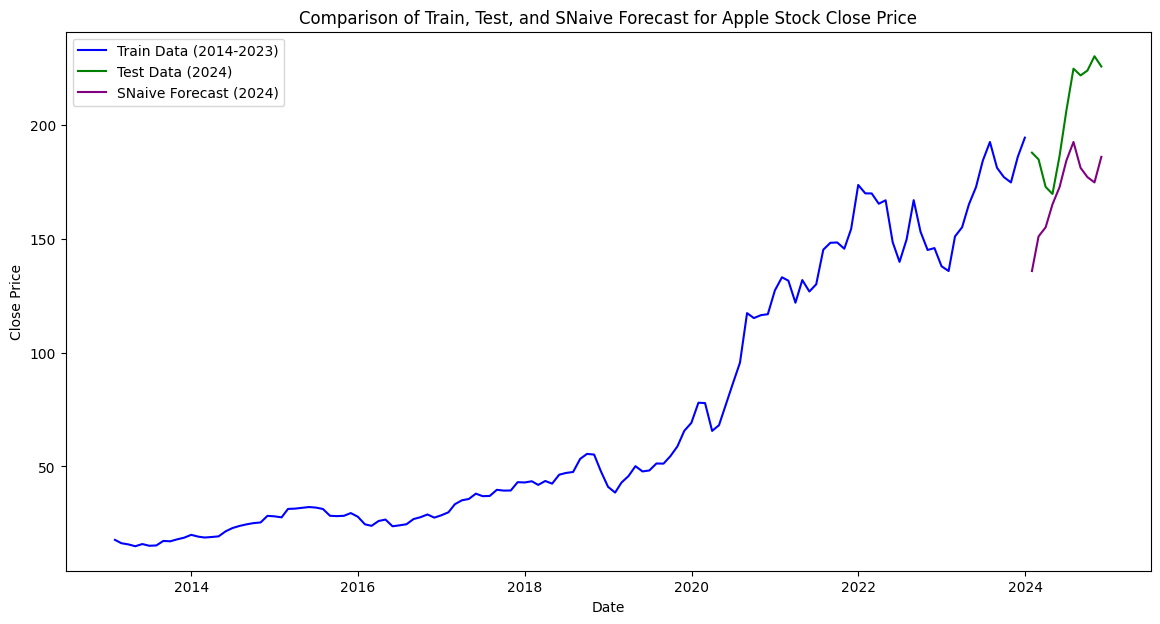

In [71]:

season_length = 12  # Monthly data (1 year seasonality)
snaive_forecast = train_data['Close'].iloc[-season_length:].values

snaive_forecast = np.tile(snaive_forecast, int(np.ceil(len(test_data) / season_length)))[:len(test_data)]

plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data['Close'], label='Train Data (2014-2023)', color='blue')
plt.plot(test_data.index, test_data['Close'], label='Test Data (2024)', color='green')
plt.plot(test_data.index, snaive_forecast, label='SNaive Forecast (2024)', color='purple')
plt.title('Comparison of Train, Test, and SNaive Forecast for Apple Stock Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()



In [72]:
# # Import necessary libraries
# import pandas as pd
# import matplotlib.pyplot as plt
# from prophet import Prophet

# # Prepare the data for Prophet
# # Replace 'train_data' with your actual training DataFrame containing 'Date' and 'Close' columns
# prophet_data = train_data.reset_index()[['Date', 'Close']]
# prophet_data.columns = ['ds', 'y']  # Prophet requires the columns to be named 'ds' (date) and 'y' (value)

# # Initialize and train the Prophet model
# prophet_model = Prophet(yearly_seasonality=True)
# prophet_model.fit(prophet_data)

# # Create a future DataFrame only for past data to visualize the components
# future = prophet_model.make_future_dataframe(periods=0)  # No additional periods needed for components plot

# # Forecast on the past data to get seasonal components
# forecast = prophet_model.predict(future)

# # Plot the components, including the monthly seasonality
# fig = prophet_model.plot_components(forecast)
# plt.show()

# # Customizing the model to focus on monthly seasonality
# # Adding a specific monthly seasonality
# prophet_model = Prophet(yearly_seasonality=False)  # Disable default yearly seasonality if needed
# prophet_model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
# prophet_model.fit(prophet_data)

# # Forecast on past data with custom seasonality
# forecast = prophet_model.predict(future)

# # Plot the components with custom monthly seasonality included
# fig = prophet_model.plot_components(forecast)
# plt.show()


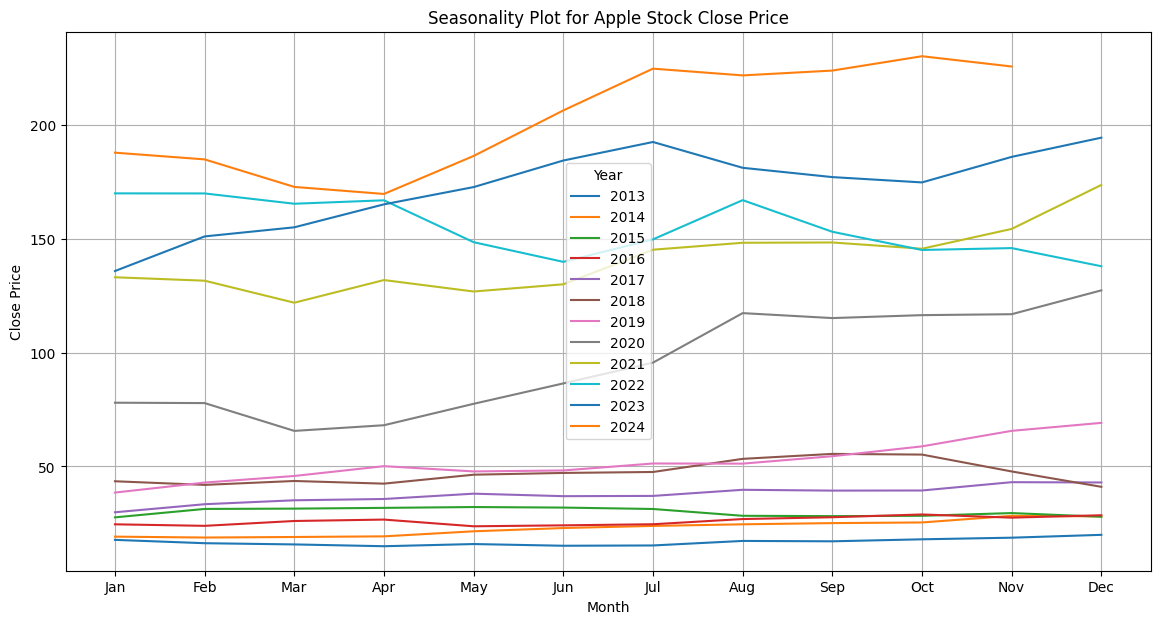

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data['Month'] = data.index.month
data['Year'] = data.index.year

seasonal_data = data.pivot_table(values='Close', index='Month', columns='Year')

plt.figure(figsize=(14, 7))
for year in seasonal_data.columns:
    plt.plot(seasonal_data.index, seasonal_data[year], label=year)

plt.title('Seasonality Plot for Apple Stock Close Price')
plt.xlabel('Month')
plt.ylabel('Close Price')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.show()


Yes, the seasonality plot of the Apple stock close price for each year indicates some level of seasonality in certain periods:

1. **General Uptrend in Certain Months**:
   - Some years, such as 2020 and 2023, show a clear upward trend from June to December. This could indicate a seasonal effect where Apple stock prices tend to increase in the latter half of the year.
   
2. **Early Year Decline**:
   - For certain years like 2022 and 2024, there is a slight decline or plateau from January to March or April, which might suggest that the start of the year often sees less aggressive stock price growth.

3. **Yearly Differences**:
   - There is a noticeable variance across different years. For instance, 2018 has a fairly stable trend throughout the year, while 2021 shows a steady increase, highlighting that some years exhibit stronger seasonality than others.

4. **Mid-Year Behavior**:
   - The mid-year months (around June to August) often show mixed trends. For some years, like 2019 and 2016, there is a decrease or leveling off, while in other years (e.g., 2021), there is a noticeable increase.

**Conclusion**:
- While there is some evidence of seasonal patterns in the Apple stock close prices, the level of seasonality can vary significantly year-to-year. In general, the latter part of the year seems to show an increase in prices for multiple years, indicating a potential seasonal trend.
- It’s important to consider other factors like market conditions and events that could also impact these trends.

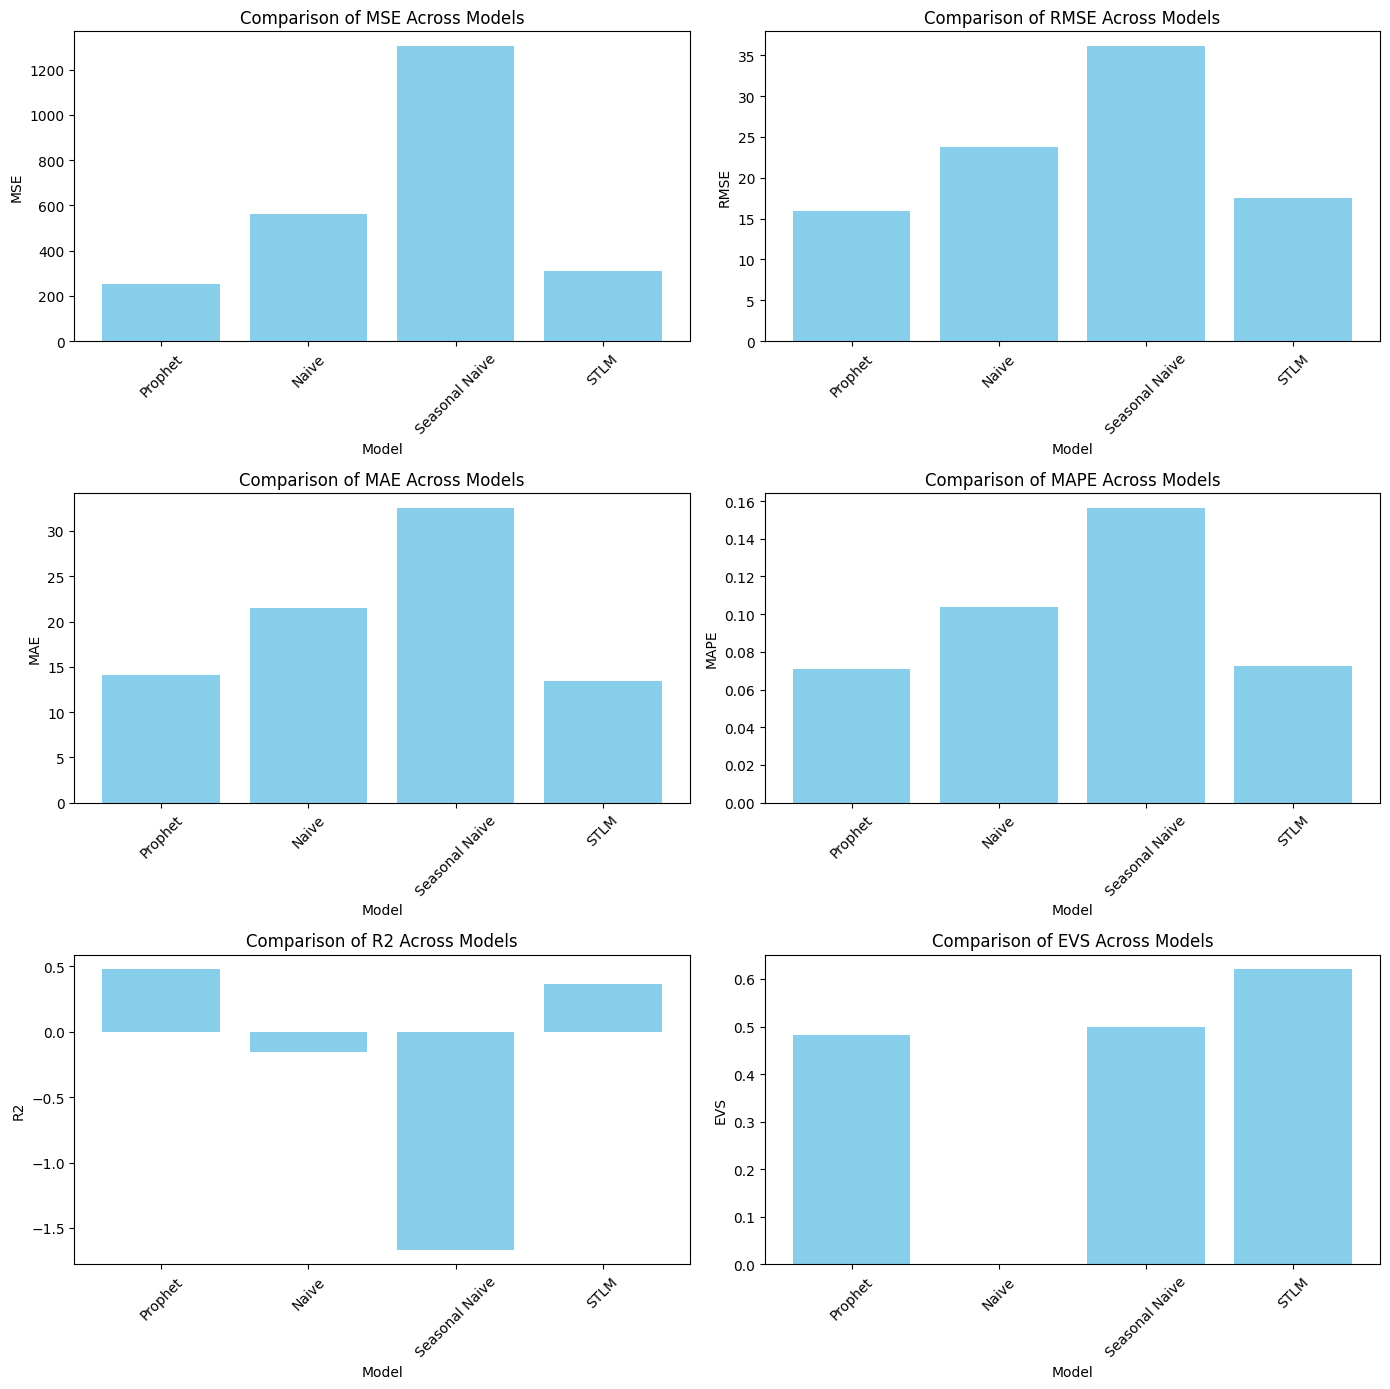

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, explained_variance_score

test = monthly_data['2024':]
def evaluate_model(y_true, y_pred, model_name):
    
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    evs = explained_variance_score(y_true, y_pred)
    
    return {
        "Model": model_name,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "MAPE": mape,
        "R2": r2,
        "EVS": evs
    }

def plot_metrics_grid(metrics_list):
    metric_names = ["MSE", "RMSE", "MAE", "MAPE", "R2", "EVS"]
    
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 14))
    axes = axes.flatten()  
    
    for i, metric in enumerate(metric_names):
        axes[i].bar([m["Model"] for m in metrics_list], [m[metric] for m in metrics_list], color='skyblue')
        axes[i].set_title(f"Comparison of {metric} Across Models")
        axes[i].set_xlabel("Model")
        axes[i].set_ylabel(metric)
        axes[i].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()


models_metrics = []
models_metrics.append(evaluate_model(test['Close'], prophet_forecast['yhat'], "Prophet"))
models_metrics.append(evaluate_model(test['Close'], naive_forecast, "Naive"))
models_metrics.append(evaluate_model(test['Close'], snaive_forecast, "Seasonal Naive"))
models_metrics.append(evaluate_model(test['Close'], stlm_forecast, "STLM"))

plot_metrics_grid(models_metrics)
